#라이브러리 및 GPU

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import math
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

device(type='cuda')

#데이터 임포트 및 EDA

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##train set

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/DSL/모델프2023_1/train_jg_ratio.csv')

In [ ]:
train['시간'] = pd.to_datetime(train['시간'])

In [ ]:
train['Hour'] = [x.hour for x in train['시간']]
train['Weekday'] = [x.weekday() for x in train['시간']]

In [ ]:
train['volume'] = (train['volume']-train['volume'].mean())/train['volume'].std()
train["workhour"] = np.where(((train['Weekday']<5) & (((train["Hour"] >= 17) & (train["Hour"] <= 19)) | ((train["Hour"] >= 7) & (train["Hour"] <= 9)))) , 1, 0)

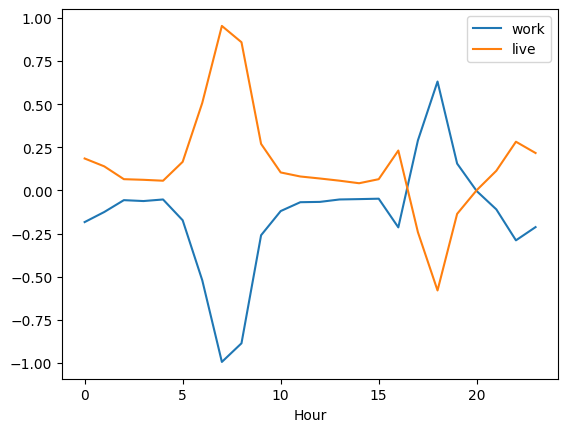

In [ ]:
train[(train['Weekday']<5)&(train['cluster']<200)].groupby('Hour')['순대여량'].mean().plot(label = 'work')
train[(train['Weekday']<5)&(train['cluster']>200)].groupby('Hour')['순대여량'].mean().plot(label = 'live')
plt.legend()

<Axes: xlabel='Hour'>

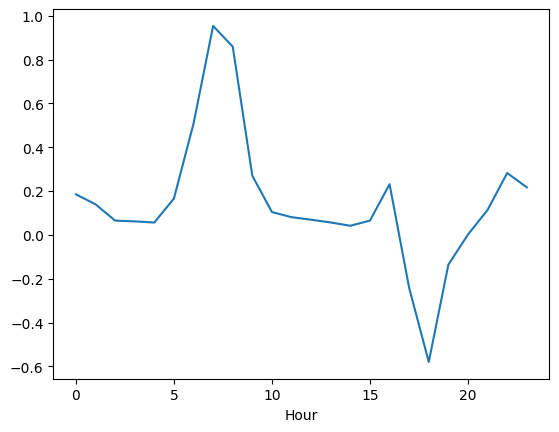

In [ ]:
train[(train['Weekday']<5)&(train['cluster']>200)].groupby('Hour')['순대여량'].mean().plot()

##test set

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/DSL/모델프2023_1/test_jg_ratio.csv')

In [ ]:
test['시간'] = pd.to_datetime(test['시간'])

In [ ]:
test['Hour'] = [x.hour for x in test['시간']]
test['Weekday'] = [x.weekday() for x in test['시간']]

In [ ]:
test['volume'] = (test['volume']-test['volume'].mean())/test['volume'].std()
test["workhour"] = np.where(((test['Weekday']<5) & (((test["Hour"] >= 17) & (test["Hour"] <= 19)) | ((test["Hour"] >= 7) & (test["Hour"] <= 9)))) , 1, 0)

In [ ]:
test

,cluster,시간,순대여량,기온,풍속,강수량,미세먼지,초미세먼지,volume,정기권이용자비율,Hour,Weekday,workhour
0,0,2022-05-01 00:00:00,-7.0,11.9,1.2,0.0,52.0,35.0,-0.718271,0.625000,0,6,0
1,0,2022-05-01 01:00:00,8.0,11.5,0.8,0.0,47.0,31.0,-0.718271,0.666667,1,6,0
2,0,2022-05-01 02:00:00,1.0,11.1,0.9,0.0,40.0,25.0,-0.718271,0.750000,2,6,0
3,0,2022-05-01 03:00:00,0.0,10.0,0.4,0.0,34.0,19.0,-0.718271,1.000000,3,6,0
4,0,2022-05-01 04:00:00,2.0,9.8,1.1,0.0,31.0,17.0,-0.718271,1.000000,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
883195,399,2022-07-31 19:00:00,0.0,26.7,0.6,0.5,11.0,7.0,-0.236031,1.000000,19,6,0
883196,399,2022-07-31 20:00:00,0.0,26.5,0.7,0.5,12.0,8.0,-0.305633,0.000000,20,6,0
883197,399,2022-07-31 21:00:00,0.0,26.1,1.1,17.5,11.0,7.0,-0.281272,1.000000,21,6,0
883198,399,2022-07-31 22:00:00,-1.0,25.9,0.8,16.5,8.0,5.0,-0.345903,0.000000,22,6,0


<Axes: xlabel='Hour'>

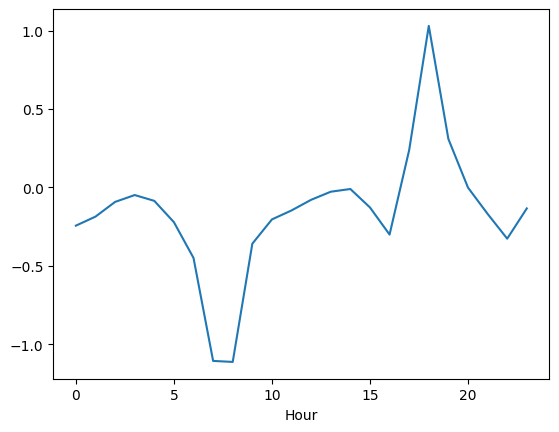

In [ ]:
test[(test['Weekday']<5)&(test['cluster']<200)].groupby('Hour')['순대여량'].mean().plot()

<Axes: xlabel='Hour'>

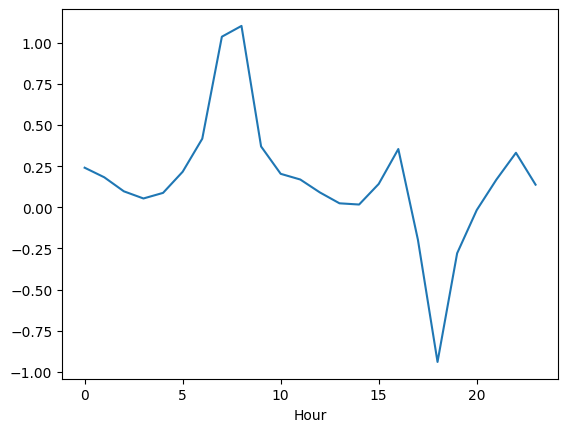

In [ ]:
test[(test['Weekday']<5)&(test['cluster']>200)].groupby('Hour')['순대여량'].mean().plot()

##비교

###순대여량 2021, 2022

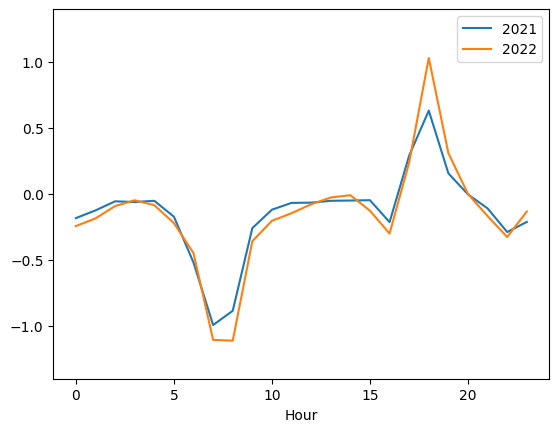

In [ ]:
train[(train['Weekday']<5)&(train['cluster']<200)].groupby('Hour')['순대여량'].mean().plot(label='2021')
test[(test['Weekday']<5)&(test['cluster']<200)].groupby('Hour')['순대여량'].mean().plot(label='2022')
plt.ylim(-1.4, 1.4)
plt.legend()

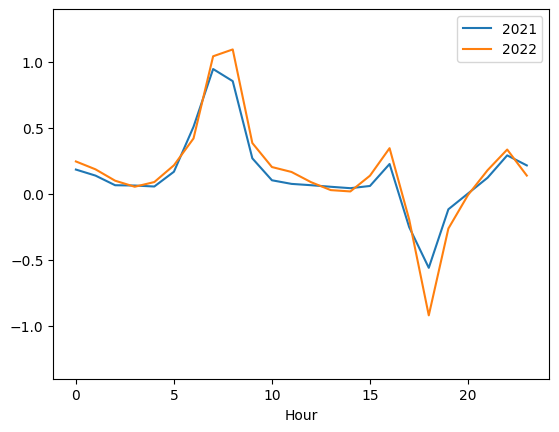

In [ ]:
train[(train['Weekday']<5)&(train['cluster']>=200)].groupby('Hour')['순대여량'].mean().plot(label='2021')
test[(test['Weekday']<5)&(test['cluster']>=200)].groupby('Hour')['순대여량'].mean().plot(label='2022')
plt.ylim(-1.4, 1.4)
plt.legend()

###지하철이용량 2021, 2022

<Axes: xlabel='Hour'>

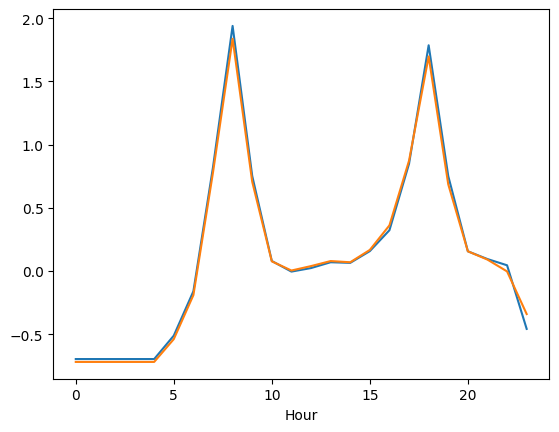

In [ ]:
train[(train['Weekday']<5)&(train['cluster']<200)].groupby('Hour')['volume'].mean().plot()
test[(test['Weekday']<5)&(test['cluster']<200)].groupby('Hour')['volume'].mean().plot()

<Axes: xlabel='Hour'>

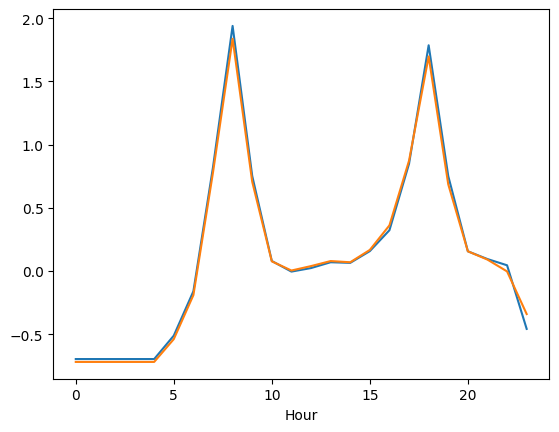

In [ ]:
train[(train['Weekday']<5)&(train['cluster']<200)].groupby('Hour')['volume'].mean().plot()
test[(test['Weekday']<5)&(test['cluster']<200)].groupby('Hour')['volume'].mean().plot()

###정기권 이용자 2021, 2022

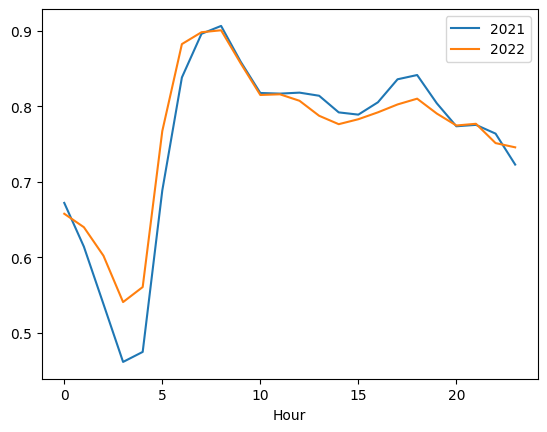

In [ ]:
train[(train['Weekday']<5)&(train['cluster']<200)].groupby('Hour')['정기권이용자비율'].mean().plot(label = '2021')
test[(test['Weekday']<5)&(test['cluster']<200)].groupby('Hour')['정기권이용자비율'].mean().plot(label = '2022')
plt.legend()

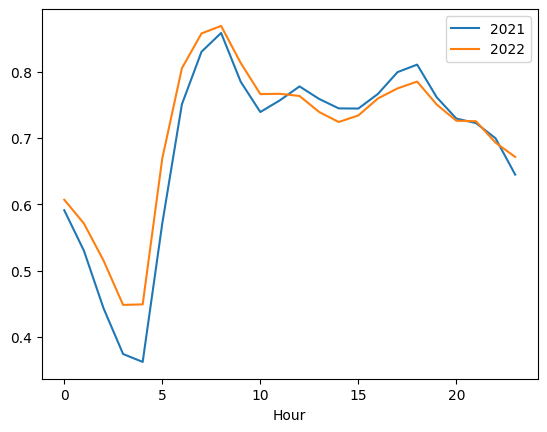

In [ ]:
train[(train['Weekday']<5)&(train['cluster']>=200)].groupby('Hour')['정기권이용자비율'].mean().plot(label = '2021')
test[(test['Weekday']<5)&(test['cluster']>=200)].groupby('Hour')['정기권이용자비율'].mean().plot(label = '2022')
plt.legend()

#데이터 토치화

##train set

In [ ]:
train_df = train[['시간', 'cluster', '순대여량',	'기온',	'풍속',	'강수량',	'미세먼지',	'초미세먼지', 'volume', 'workhour', '정기권이용자비율']]
train_df

,시간,cluster,순대여량,기온,풍속,강수량,미세먼지,초미세먼지,volume,workhour,정기권이용자비율
0,2021-05-01 00:00:00,0,0.0,11.3,1.3,0.0,31.0,16.0,-0.695520,0,0.714286
1,2021-05-01 01:00:00,0,1.0,11.2,1.6,0.0,31.0,17.0,-0.695520,0,1.000000
2,2021-05-01 02:00:00,0,-2.0,10.8,1.5,0.0,29.0,16.0,-0.695520,0,1.000000
3,2021-05-01 03:00:00,0,2.0,10.9,0.3,0.0,33.0,20.0,-0.695520,0,1.000000
4,2021-05-01 04:00:00,0,0.0,10.9,1.3,0.0,36.0,23.0,-0.695520,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
883195,2021-07-31 19:00:00,399,-7.0,31.2,2.0,0.0,26.0,17.0,-0.166982,0,0.727273
883196,2021-07-31 20:00:00,399,-5.0,29.7,1.3,0.0,23.0,15.0,-0.244197,0,0.687500
883197,2021-07-31 21:00:00,399,0.0,28.8,1.4,0.0,18.0,12.0,-0.184383,0,0.823529
883198,2021-07-31 22:00:00,399,-6.0,28.6,2.0,0.0,18.0,12.0,-0.264316,0,0.866667


In [ ]:
train_df.to_csv('/content/drive/MyDrive/DSL/모델프2023_1/train_jg_wh.csv', index = False)

In [ ]:
list_train = []
for i, time in enumerate(train_df['시간'].unique()):
  temp = train_df[train_df['시간'] == time]['순대여량']
  list_train.append(list(temp))
  if (i+1) % 1000 == 0:
    print((i+1)/len(train_df['시간'].unique()))
list_train = np.array(list_train)

0.4528985507246377
0.9057971014492754


In [ ]:
print(len(train_df['시간'].unique()))
print(len(train_df['cluster'].unique()))
print(list_train.shape)

2208
400
(2208, 400)


In [ ]:
def window_slider(data_np, sequence_length, batch_size, input_size):

  """
  window slider와 tensor화를 동시에 진행
  data_np: 대상 np array
  batch_size: 배치 크기, input_size: 인풋 벡터당 길이, sequence_length: 시퀀스당 포함할 인풋 벡터의 수
  """

  data_length = len(data_np)
  batch_size = int(batch_size)  
  input_size = int(input_size)
  sequence_length = int(sequence_length)

  mat = torch.zeros(data_length - sequence_length + 1, sequence_length, input_size)

  for i in range(data_length - sequence_length+1):
    mat[i] = torch.from_numpy(data_np[i:sequence_length+i])

  return mat

In [ ]:
batch_size = len(list_train)
sequence_length = 10
input_size = 400
data_length_ = len(list_train)

In [ ]:
X_train = window_slider(list_train[:-3], sequence_length, batch_size, input_size)
print(X_train.shape) #batch_size, sequence_length, input_size

torch.Size([2196, 10, 400])


In [ ]:
y_train = window_slider(list_train[3:], sequence_length, batch_size, input_size)[:,-1,:] #시퀀스의 마지막 행만, 즉 현재 시점 기준으로 3시간 후의 값만 타겟
print(y_train.shape)

torch.Size([2196, 400])


In [ ]:
jg_train = []
for i, time in enumerate(train_df['시간'].unique()):
  temp = train_df[train_df['시간'] == time]['정기권이용자비율']
  jg_train.append(temp)
  if (i+1) % 1000 == 0:
    print((i+1)/len(train_df['시간'].unique()))
jg_train = np.array(jg_train)

0.4528985507246377
0.9057971014492754


In [ ]:
jg_train = window_slider(jg_train[:-3], sequence_length, batch_size, input_size)
print(jg_train.shape) #batch_size, sequence_length, input_size

torch.Size([2196, 10, 400])


In [ ]:
workhour_train = []
for i, time in enumerate(train_df['시간'].unique()):
  temp = train_df[train_df['시간'] == time]['workhour']
  workhour_train.append(temp)
  if (i+1) % 1000 == 0:
    print((i+1)/len(train_df['시간'].unique()))
workhour_train = np.array(workhour_train)

0.4528985507246377
0.9057971014492754


In [ ]:
workhour_train = window_slider(workhour_train[:-3], sequence_length, batch_size, input_size)
print(workhour_train.shape) #batch_size, sequence_length, input_size

torch.Size([2196, 10, 400])


##test set

In [ ]:
test_df = test[['시간', 'cluster', '순대여량',	'기온',	'풍속',	'강수량',	'미세먼지',	'초미세먼지', 'volume', 'workhour', '정기권이용자비율']]
test_df

,시간,cluster,순대여량,기온,풍속,강수량,미세먼지,초미세먼지,volume,workhour,정기권이용자비율
0,2022-05-01 00:00:00,0,-7.0,11.9,1.2,0.0,52.0,35.0,-0.718271,0,0.625000
1,2022-05-01 01:00:00,0,8.0,11.5,0.8,0.0,47.0,31.0,-0.718271,0,0.666667
2,2022-05-01 02:00:00,0,1.0,11.1,0.9,0.0,40.0,25.0,-0.718271,0,0.750000
3,2022-05-01 03:00:00,0,0.0,10.0,0.4,0.0,34.0,19.0,-0.718271,0,1.000000
4,2022-05-01 04:00:00,0,2.0,9.8,1.1,0.0,31.0,17.0,-0.718271,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
883195,2022-07-31 19:00:00,399,0.0,26.7,0.6,0.5,11.0,7.0,-0.236031,0,1.000000
883196,2022-07-31 20:00:00,399,0.0,26.5,0.7,0.5,12.0,8.0,-0.305633,0,0.000000
883197,2022-07-31 21:00:00,399,0.0,26.1,1.1,17.5,11.0,7.0,-0.281272,0,1.000000
883198,2022-07-31 22:00:00,399,-1.0,25.9,0.8,16.5,8.0,5.0,-0.345903,0,0.000000


In [ ]:
test_df.to_csv('/content/drive/MyDrive/DSL/모델프2023_1/test_jg_wh.csv', index = False)

In [ ]:
list_test = []
for i, time in enumerate(test_df['시간'].unique()):
  temp = test_df[test_df['시간'] == time]['순대여량']
  list_test.append(list(temp))
  if (i+1) % 1000 == 0:
    print((i+1)/len(test_df['시간'].unique()))
list_test = np.array(list_test)

0.4528985507246377
0.9057971014492754


In [ ]:
batch_size = len(list_test)
sequence_length = 10
input_size = 400
data_length_ = len(list_test)

In [ ]:
X_test = window_slider(list_test[:-3], sequence_length, batch_size, input_size)
print(X_test.shape) #batch_size, sequence_length, input_size

torch.Size([2196, 10, 400])


In [ ]:
y_test = window_slider(list_test[3:], sequence_length, batch_size, input_size)[:,-1,:] #시퀀스의 마지막 행만, 즉 현재 시점 기준으로 3시간 후의 값만 타겟
print(y_test.shape)

torch.Size([2196, 400])


In [ ]:
jg_test = []
for i, time in enumerate(test_df['시간'].unique()):
  temp = test_df[test_df['시간'] == time]['정기권이용자비율']
  jg_test.append(list(temp))
  if (i+1) % 1000 == 0:
    print((i+1)/len(test_df['시간'].unique()))
jg_test = np.array(jg_test)

0.4528985507246377
0.9057971014492754


In [ ]:
jg_test = window_slider(jg_test[:-3], sequence_length, batch_size, input_size) #시퀀스의 마지막 행만, 즉 현재 시점 기준으로 3시간 후의 값만 타겟
print(jg_test.shape)

torch.Size([2196, 10, 400])


In [ ]:
workhour_test = []
for i, time in enumerate(test_df['시간'].unique()):
  temp = test_df[test_df['시간'] == time]['workhour']
  workhour_test.append(list(temp))
  if (i+1) % 1000 == 0:
    print((i+1)/len(test_df['시간'].unique()))
workhour_test = np.array(workhour_test)

0.4528985507246377
0.9057971014492754


In [ ]:
workhour_test = window_slider(workhour_test[:-3], sequence_length, batch_size, input_size) #시퀀스의 마지막 행만, 즉 현재 시점 기준으로 3시간 후의 값만 타겟
print(workhour_test.shape)

torch.Size([2196, 10, 400])


#LSTM 모델 
<br> 드롭아웃 기법 추가하고
<br> seq = 10, stack_layer = 4, hidd = 400, drop-out = 0.2
<br> fclayer: 400->200, 200->400

In [ ]:
# define the RNN model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()

        self.hidden_size = hidden_size #hidden size 지정
        self.num_layers = num_layers #num_layers 지정   

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first = True, dropout = 0.2) 
          #input_size와 hidden_size를 정해준 RNN
          #input_size는 인풋 벡터의 차원: input 행렬은 batch_size * sequence_length * input_size

          #hidden_size는 RNN셀의 아웃풋 벡터의 차원: hidden 행렬은 num_layers * batch_size * hidden_size
          #hidden state에는 batch_first가 적용되지 않는다.

          #기본적으로 tanh를 acti.func으로 사용

        self.fc1 = nn.Linear(hidden_size, 200)
        self.fc2 = nn.Linear(200, 400)
         
        self.jg1 = nn.Linear(hidden_size, 200)
        self.jg2 = nn.Linear(200, 400)

        self.wh1 = nn.Linear(hidden_size, 200)
        self.wh2 = nn.Linear(200, 400)

    def forward(self, input, jg, wh):
        # initialize hidden state
        h0 = torch.zeros(self.num_layers, input.size(0), self.hidden_size, device = device) #초기화된 히든스테이트
        c0 = torch.zeros(self.num_layers, input.size(0), self.hidden_size, device = device) #초기화된 히든스테이트

        # pass input through the RNN layer
        output, (hidden, cell) = self.lstm(input, (h0, c0))

        # jg
        jg = self.jg1(torch.tanh(jg))
        jg = self.jg2(torch.tanh(jg))

        wh = self.wh1(torch.tanh(wh))
        wh = self.wh2(torch.tanh(wh))

        # product
        output = output*jg*wh

        # pass the output through the fully connected layer
        output = self.fc1(output)
        output = self.fc2(torch.tanh(output))

        return output

##학습

In [ ]:
# define input and output sizes
hidden_size = 400
num_layers = 4

# define the lstm model
lstm = LSTM(input_size, hidden_size, num_layers)
lstm = lstm.to(device)

# define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=0.01)

X_train = X_train.to(device)
y_train = y_train.to(device)
jg_train = jg_train.to(device)
workhour_train = workhour_train.to(device)


In [ ]:
# train the LSTM model

loss_list = []
loss_val_list = []

for i, epoch in enumerate(range(1000)):
    optimizer.zero_grad()

    # forward pass
    outputs = lstm(X_train, jg_train, workhour_train)[:,-1,:]

    # calculate loss
    loss = criterion(outputs, y_train)

    loss_list.append(loss.item())

    # backward pass and optimization
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print('Epoch [{}/{}], MSE: {:.4f}'.format(epoch+1, 1000, loss.item()))


Epoch [10/1000], MSE: 17.2644
Epoch [20/1000], MSE: 14.6172
Epoch [30/1000], MSE: 13.1442
Epoch [40/1000], MSE: 12.2642
Epoch [50/1000], MSE: 11.5007
Epoch [60/1000], MSE: 11.0106
Epoch [70/1000], MSE: 10.5331
Epoch [80/1000], MSE: 10.2262
Epoch [90/1000], MSE: 10.0748
Epoch [100/1000], MSE: 9.9062
Epoch [110/1000], MSE: 9.8026
Epoch [120/1000], MSE: 9.7227
Epoch [130/1000], MSE: 9.7383
Epoch [140/1000], MSE: 9.6323
Epoch [150/1000], MSE: 9.5916
Epoch [160/1000], MSE: 9.5049
Epoch [170/1000], MSE: 9.4720
Epoch [180/1000], MSE: 9.4474
Epoch [190/1000], MSE: 9.3563
Epoch [200/1000], MSE: 9.3385
Epoch [210/1000], MSE: 9.2522
Epoch [220/1000], MSE: 9.2185
Epoch [230/1000], MSE: 9.1603
Epoch [240/1000], MSE: 9.1130
Epoch [250/1000], MSE: 9.0865
Epoch [260/1000], MSE: 9.0213
Epoch [270/1000], MSE: 8.9762
Epoch [280/1000], MSE: 8.9861
Epoch [290/1000], MSE: 9.0154
Epoch [300/1000], MSE: 8.9417
Epoch [310/1000], MSE: 8.8799
Epoch [320/1000], MSE: 8.8218
Epoch [330/1000], MSE: 8.8123
Epoch [340

In [ ]:
with torch.no_grad():

    # forward pass
    outputs = lstm(X_train, jg_train, workhour_train)[:,-1,:]

    # calculate loss
    loss = criterion(outputs, y_train)

    print('RMSE: {:.4f}'.format(np.sqrt(loss.item())))

RMSE: 2.7855


In [ ]:
with torch.no_grad():
  fitted = lstm(X_train, jg_train, workhour_train)[:,-1,:].cpu()

In [ ]:
fitted_df = pd.DataFrame(fitted.numpy(), index=train_df['시간'].unique()[12:], columns=train_df[3:]['cluster'].unique()).unstack().reset_index()
fitted_df.columns = ['cluster', '시간', '순대여량']
fitted_df['시간'] = pd.to_datetime(fitted_df['시간'])
fitted_df['Hour'] = [x.hour for x in fitted_df['시간']]
fitted_df['Weekday'] = [x.weekday() for x in fitted_df['시간']]
fitted_df

,cluster,시간,순대여량,Hour,Weekday
0,0,2021-05-01 12:00:00,9.026588,12,5
1,0,2021-05-01 13:00:00,2.260821,13,5
2,0,2021-05-01 14:00:00,2.961904,14,5
3,0,2021-05-01 15:00:00,0.064946,15,5
4,0,2021-05-01 16:00:00,-0.631977,16,5
...,...,...,...,...,...
878395,399,2021-07-31 19:00:00,-3.840160,19,5
878396,399,2021-07-31 20:00:00,-2.980735,20,5
878397,399,2021-07-31 21:00:00,0.584697,21,5
878398,399,2021-07-31 22:00:00,-0.912331,22,5


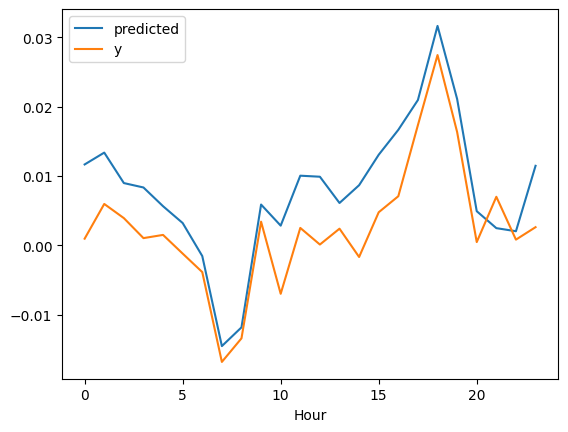

In [ ]:
fitted_df.groupby('Hour')['순대여량'].mean().plot(label = 'predicted')
train.groupby('Hour')['순대여량'].mean().plot(label='y')
plt.legend()

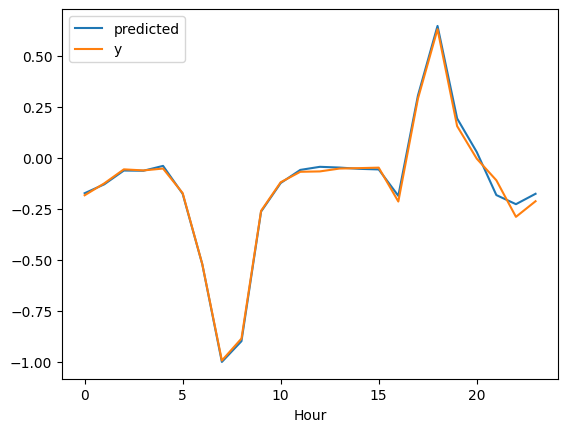

In [ ]:
fitted_df[(fitted_df['Weekday']<5)&(fitted_df['cluster']<200)].groupby('Hour')['순대여량'].mean().plot(label = 'predicted')
train[(train['Weekday']<5)&(train['cluster']<200)].groupby('Hour')['순대여량'].mean().plot(label = 'y')
plt.legend()

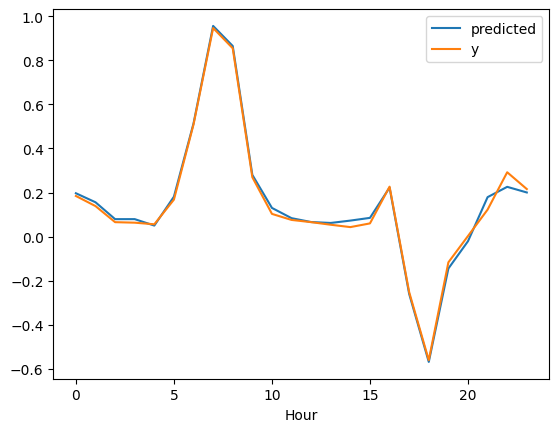

In [ ]:
fitted_df[(fitted_df['Weekday']<5)&(fitted_df['cluster']>=200)].groupby('Hour')['순대여량'].mean().plot(label = 'predicted')
train[(train['Weekday']<5)&(train['cluster']>=200)].groupby('Hour')['순대여량'].mean().plot(label = 'y')
plt.legend()

##test

In [ ]:
X_test = X_test.to(device)
y_test = y_test.to(device)
jg_test = jg_test.to(device)
workhour_test = workhour_test.to(device)

In [ ]:
with torch.no_grad():

    # forward pass
    outputs = lstm(X_test, jg_test, workhour_test)[:,-1,:]

    # calculate loss
    loss = criterion(outputs, y_test)

    print('RMSE: {:.4f}'.format(np.sqrt(loss.item())))

RMSE: 4.8698


In [ ]:
outputs = outputs.cpu()

In [ ]:
outputs_df = pd.DataFrame(outputs.numpy(), index=test_df['시간'].unique()[12:], columns=test_df[3:]['cluster'].unique()).unstack().reset_index()
outputs_df.columns = ['cluster', '시간', '순대여량']
outputs_df['시간'] = pd.to_datetime(outputs_df['시간'])
outputs_df['Hour'] = [x.hour for x in outputs_df['시간']]
outputs_df['Weekday'] = [x.weekday() for x in outputs_df['시간']]
outputs_df

,cluster,시간,순대여량,Hour,Weekday
0,0,2022-05-01 12:00:00,1.924652,12,6
1,0,2022-05-01 13:00:00,1.403872,13,6
2,0,2022-05-01 14:00:00,4.999980,14,6
3,0,2022-05-01 15:00:00,5.398328,15,6
4,0,2022-05-01 16:00:00,-1.844141,16,6
...,...,...,...,...,...
878395,399,2022-07-31 19:00:00,0.188802,19,6
878396,399,2022-07-31 20:00:00,-0.386900,20,6
878397,399,2022-07-31 21:00:00,-0.311095,21,6
878398,399,2022-07-31 22:00:00,0.644035,22,6


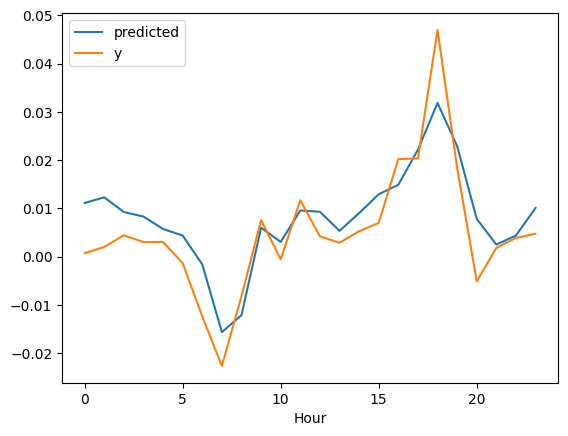

In [ ]:
outputs_df.groupby('Hour')['순대여량'].mean().plot(label = 'predicted')
test.groupby('Hour')['순대여량'].mean().plot(label='y')
plt.legend()

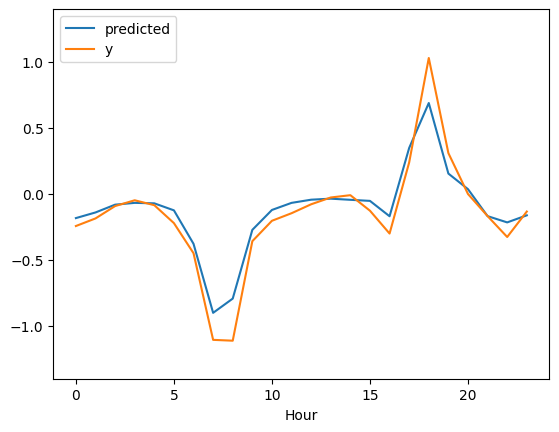

In [ ]:
outputs_df[(outputs_df['Weekday']<5)&(outputs_df['cluster']<200)].groupby('Hour')['순대여량'].mean().plot(label = 'predicted')
test[(test['Weekday']<5)&(test['cluster']<200)].groupby('Hour')['순대여량'].mean().plot(label = 'y')
plt.ylim(-1.4, 1.4)
plt.legend()

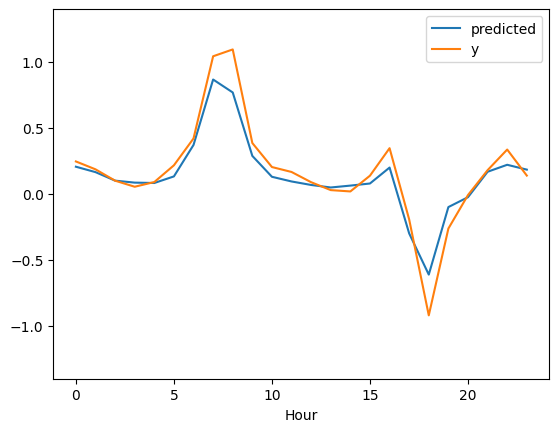

In [ ]:
outputs_df[(outputs_df['Weekday']<5)&(outputs_df['cluster']>=200)].groupby('Hour')['순대여량'].mean().plot(label = 'predicted')
test[(test['Weekday']<5)&(test['cluster']>=200)].groupby('Hour')['순대여량'].mean().plot(label = 'y')
plt.ylim(-1.4, 1.4)
plt.legend()